In [110]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-10 23:56:07,212: Credentials are already in use. The existing account in the session will be replaced.


# Chapter 8 - Terra

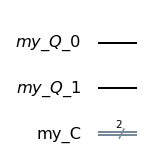

In [112]:
# Import registers
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'my_Q')
cr = ClassicalRegister(2, 'my_C')
qc = QuantumCircuit(qr,cr)
qc.draw()


In [113]:
qc = QuantumCircuit(QuantumRegister(2, 'my_Q'), ClassicalRegister(2, 'my_C'))

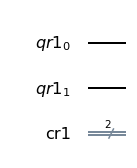

In [114]:
#Import the register classes
from qiskit import QuantumRegister, ClassicalRegister
#Create the quantum and classical registers, each with labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
#Create the quantum circuit using the registers
qc1 = QuantumCircuit(qr1, cr1)
#Draw the circuit
qc1.draw()


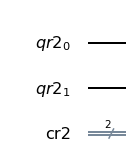

In [115]:
#Create two Quantum and Classical registers
qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
#Create a second circuit using the registers created above
qc2 = QuantumCircuit(qr2, cr2)
#Draw the second quantum circuit
qc2.draw()


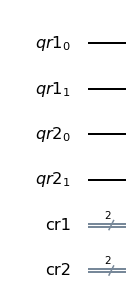

In [116]:
#Concatenate the two previous circuits to create a new circuit
qc_combined = qc1 + qc2
#Draw the concatenated circuit
qc_combined.draw()


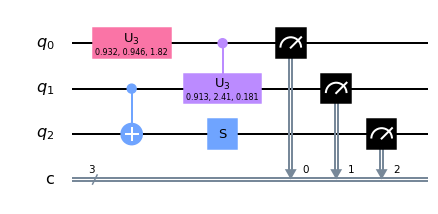

In [117]:
#Import the random_circuit class
from qiskit.circuit.random import random_circuit
#Construct the random circuit with the number of qubits = 3
#with a depth = 2, and include the measurement operator for each qubit
qc = random_circuit(3, 2, measure=True)
#Draw the circuit
qc.draw()


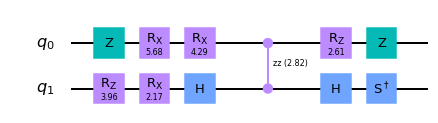

In [119]:
# Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits, each with 2 qubit registers and random #gate operator counts.
qc1 = random_circuit(2,2)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1 + qc2
#Draw the circuit
qc.draw()


In [120]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ',width) 
    print('Depth = ', depth)
    print('Circuit size = ',circuit_size)
    print('Number of operators = ', num_operators)


In [121]:
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)


Width =  2
Depth =  6
Circuit size =  11
Number of operators =  OrderedDict([('rx', 3), ('rz', 2), ('z', 2), ('h', 2), ('rzz', 1), ('sdg', 1)])


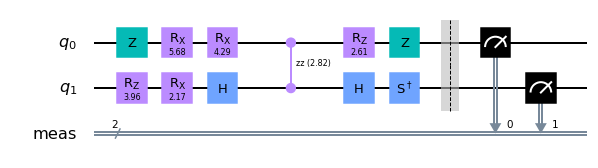

In [122]:
#Use measure_all() to automatically add the barrier, measurement, and #classical register to our existing circuit.
qc.measure_all()
#Draw the circuit
qc.draw()


In [123]:
#Print out the circuit properties
print_circuit_props(qc)


Width =  4
Depth =  7
Circuit size =  13
Number of operators =  OrderedDict([('rx', 3), ('rz', 2), ('z', 2), ('h', 2), ('measure', 2), ('rzz', 1), ('sdg', 1), ('barrier', 1)])


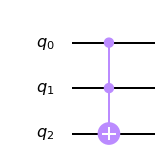

In [124]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()


In [125]:
#Print out the circuit properties
print_circuit_props(qc)


Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('ccx', 1)])


In [126]:
#Print out the circuit properties
print_circuit_props(qc.decompose())


Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


# Customization and Parameterization of circuits

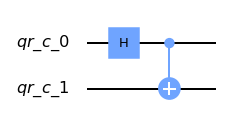

In [127]:
#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c')
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='my-composite')
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting 
#the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw()


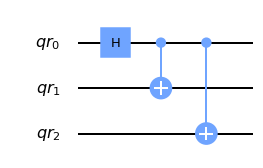

In [128]:
#Create your 2-qubit circuit to generate your composite gate
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function 
#of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw()


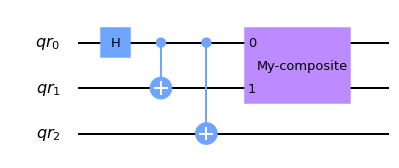

In [130]:
#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw()


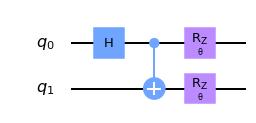

In [132]:
#Import the Parameter object
from qiskit.circuit import Parameter
#Construct the Parameter set to Theta
param_theta = Parameter('θ')
#Create a two-qubit quantum circuit and add some gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#Include a rotation gate which we wish to apply 
#the Parameter value 
qc.rz(param_theta,0)
qc.rz(param_theta,1)
#Draw the circuit
qc.draw()


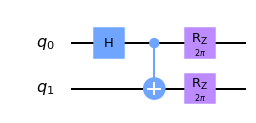

In [134]:
import numpy as np
#Bind the parameters with a value, in this case 2π
qc = qc.bind_parameters({param_theta: 2*np.pi})
#Draw the circuit with the set parameter values
qc.draw()


# Generating Pulse schedules on quantum hardware

In [136]:
#Import pulse classes
from qiskit.pulse import SamplePulse, DriveChannel, Play, Schedule
#Import some helpful utils
from qiskit.scheduler.utils import measure_all


/opt/conda/lib/python3.7/site-packages/qiskit/pulse/library/sample_pulse.py:44: DeprecationWarning: SamplePulse has been renamed to Waveform and is deprecated. Please replace SamplePulse(samples, channel) with Waveform(samples, channel).
  "Waveform(samples, channel).", DeprecationWarning)


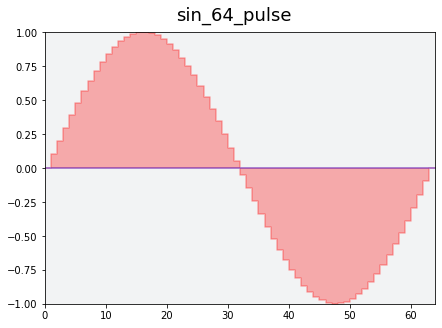

In [137]:
#Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
#Generate our SamplePulse 
sample_pulse = SamplePulse(data, name="sin_64_pulse")
#Draw the generated sample pulse
sample_pulse.draw()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: the pulse_lib module is deprecated, pulse_lib is renamed to library
  


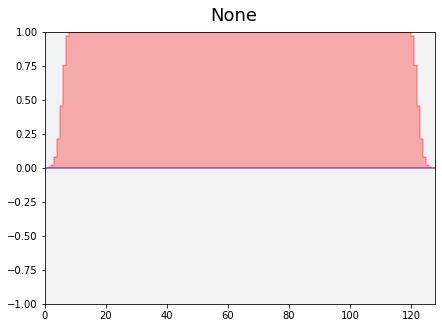

In [138]:
#Import the Gaussian Square pulse from Pulse Library
from qiskit.pulse.pulse_lib import GaussianSquare
#Create a Gaussian Square pulse: 
#Args: duration, amp, sigma, width, name
gaussian_square_pulse = GaussianSquare(128,1,2,112, "gaussian square")
gaussian_square_pulse.draw()


# Generating and executing Schedules

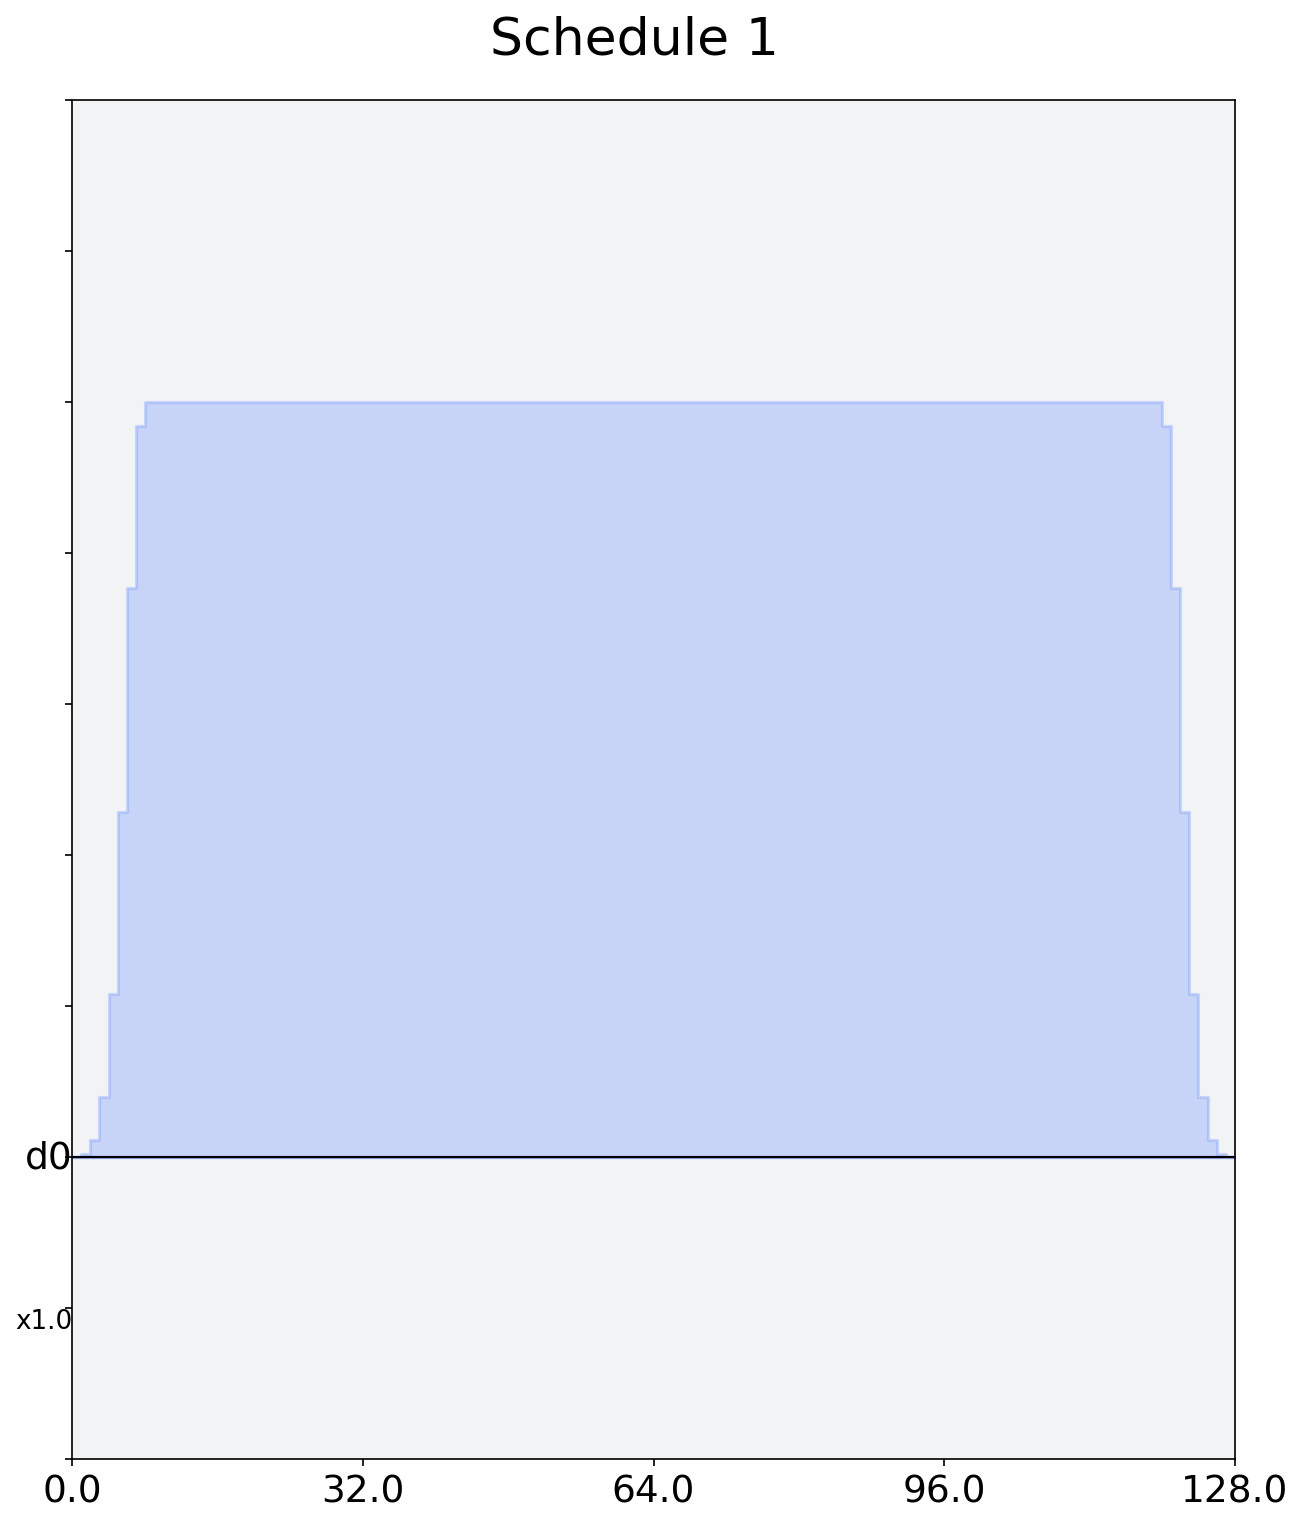

In [139]:
#Create the first schedule with our Gaussian Square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
#Draw the schedule
schedule_1.draw()


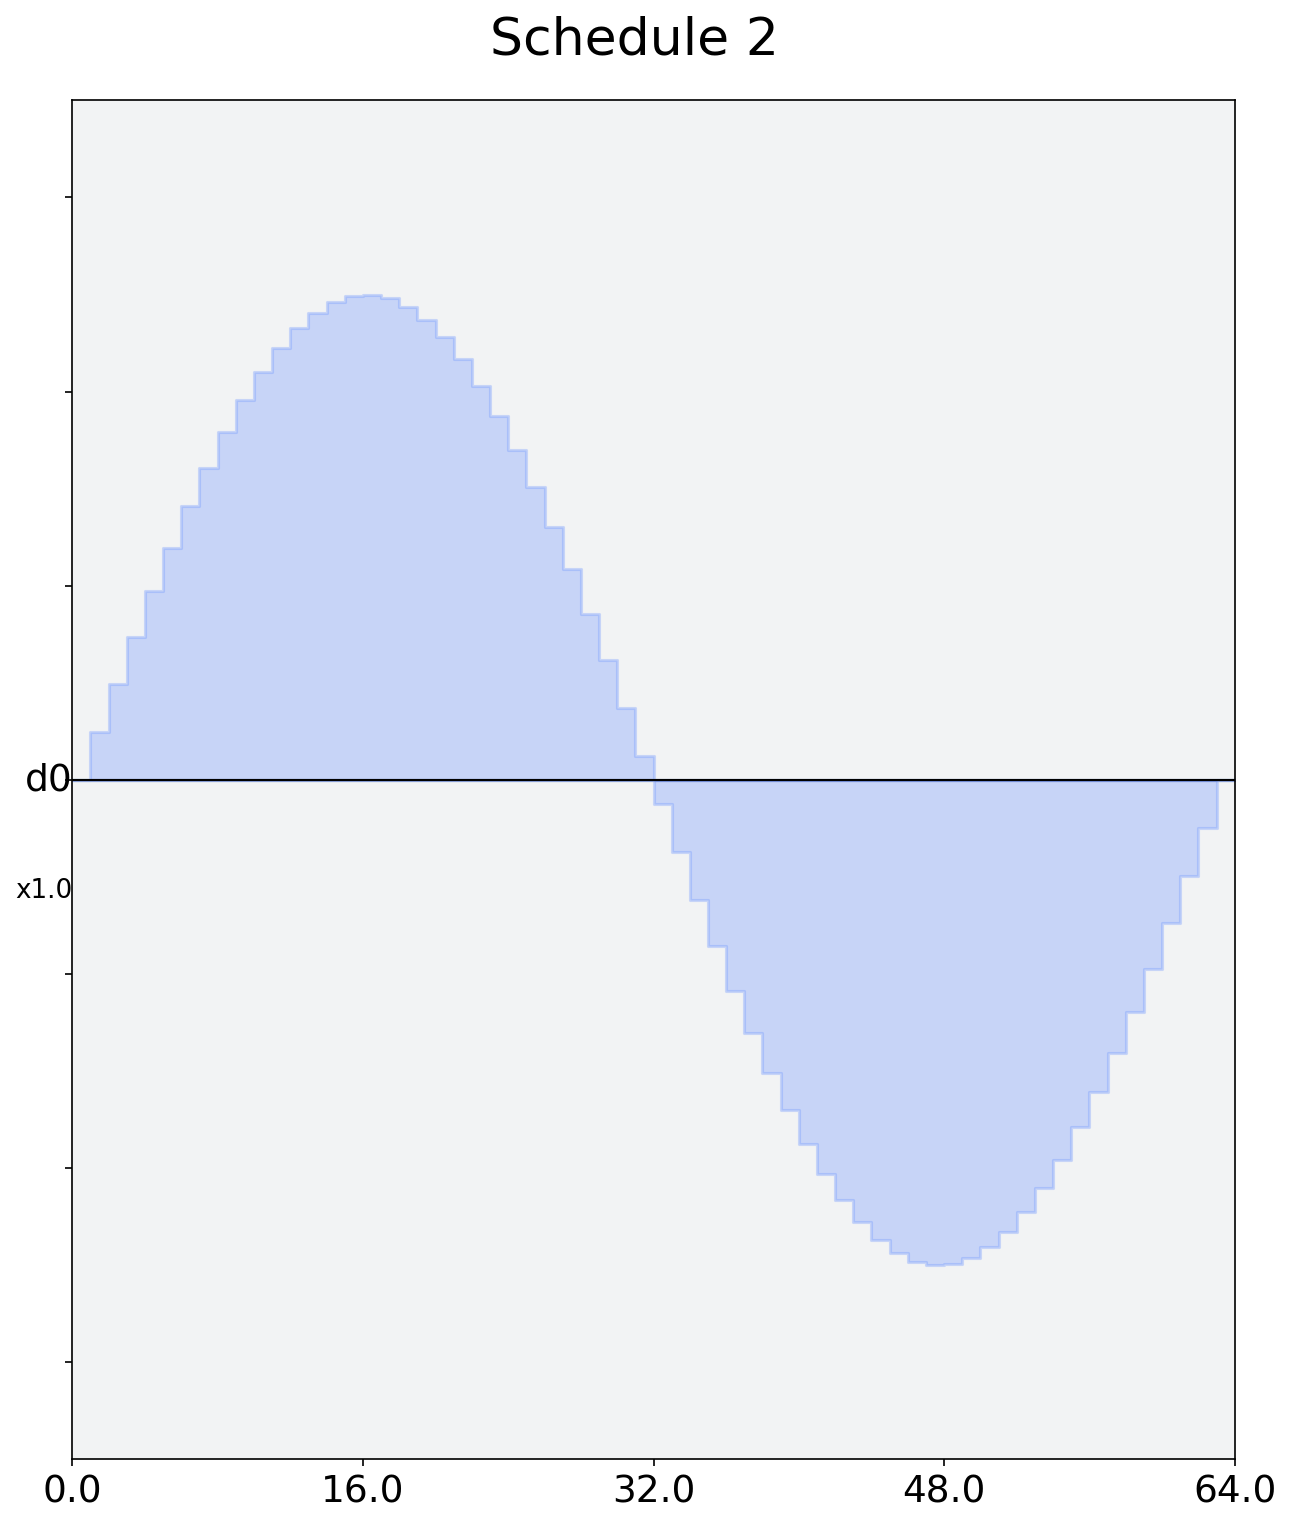

In [140]:
#Create a second schedule with our sample pulse
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(sample_pulse, DriveChannel(0)))
#Draw the schedule
schedule_2.draw()


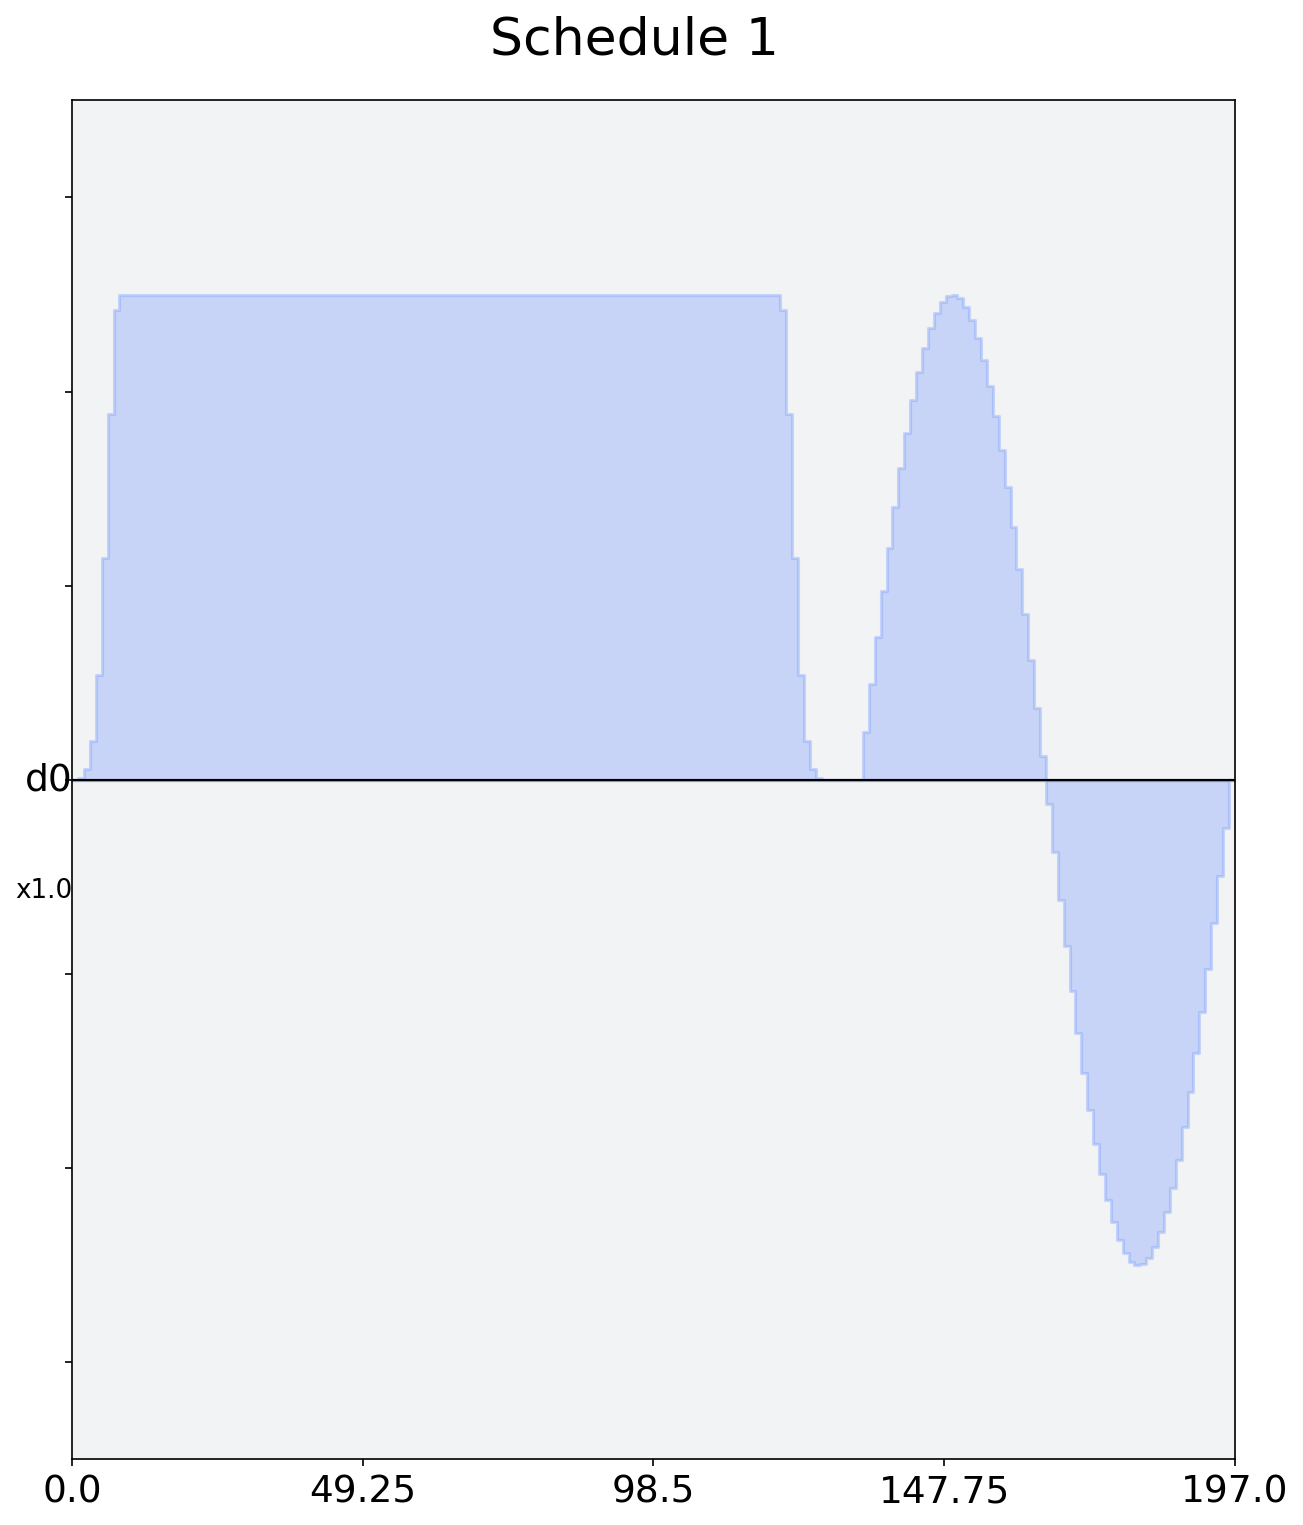

In [141]:
#Let's create a third schedule 
#Where we add the first schedule and second schedules
#And shift the second to the right by a time of 5 after the first
schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2)
schedule_3.draw()


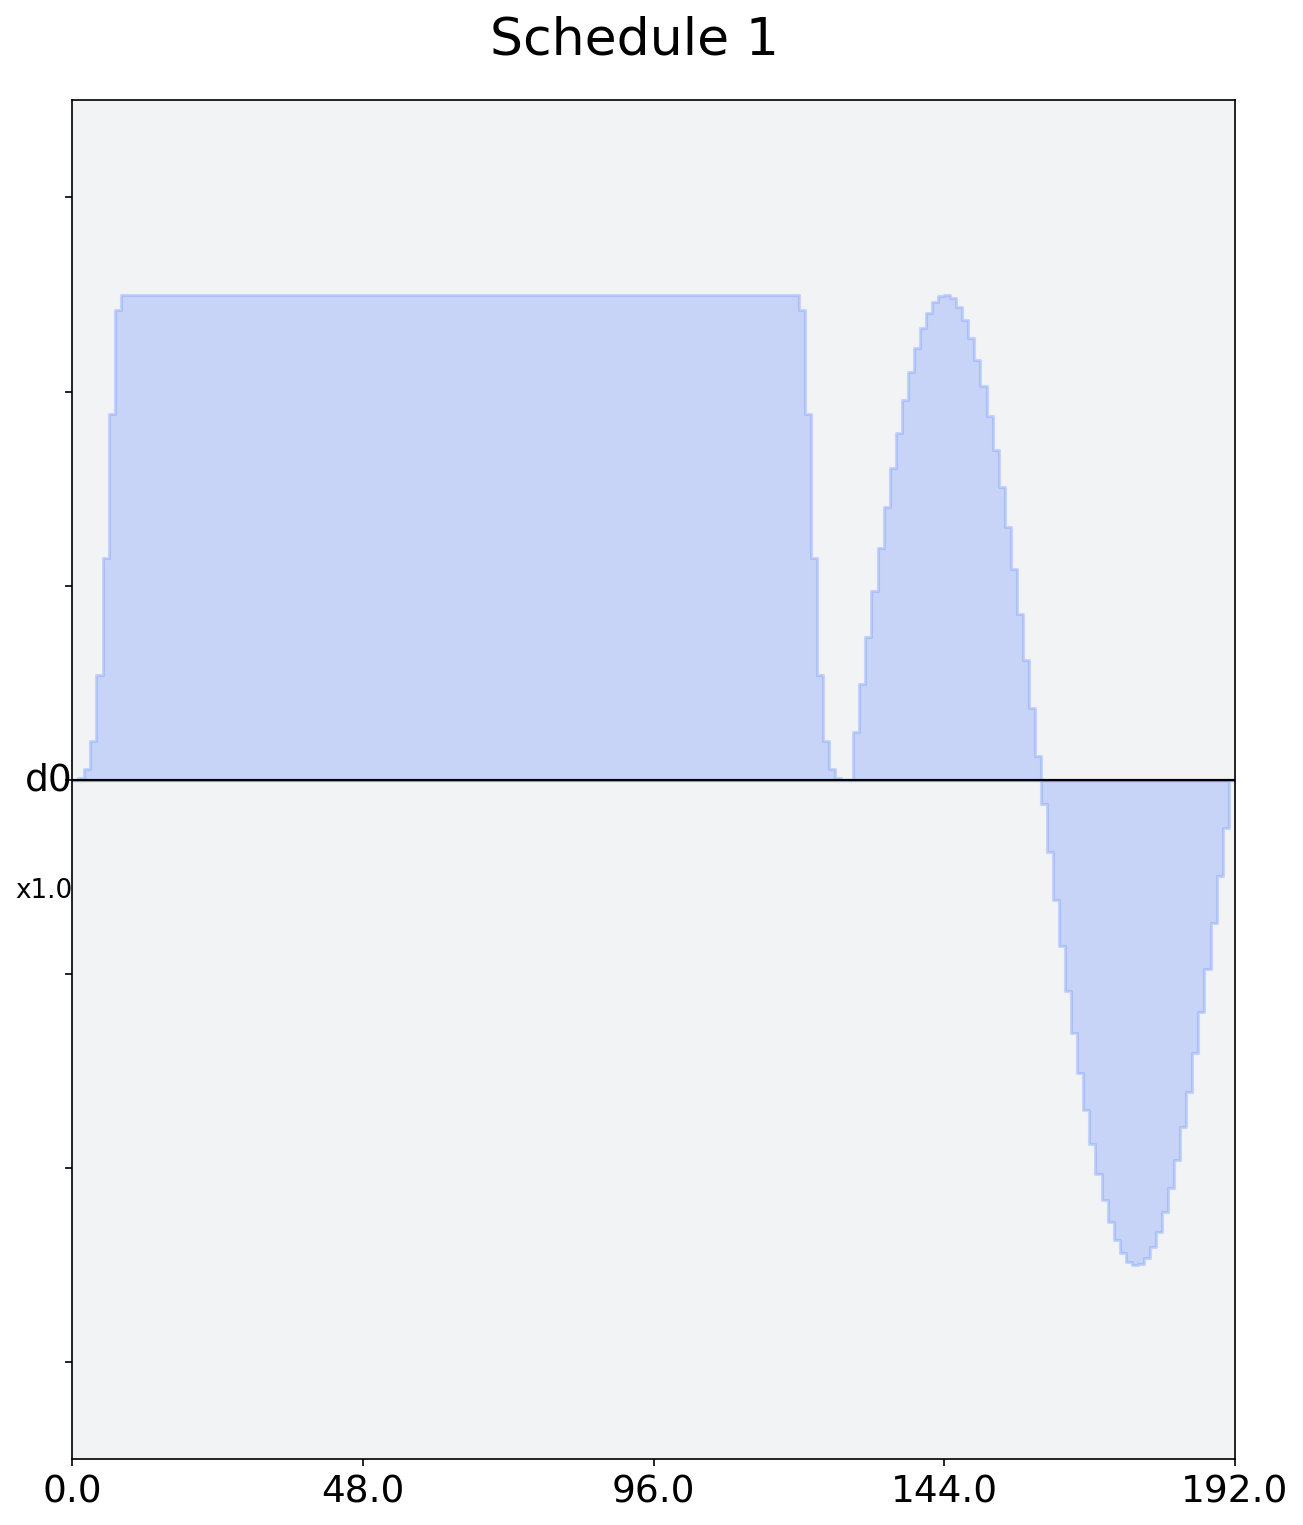

In [142]:
#We could have also combined the two using the append operator
#The two schedules are appended immediately after one another
schedule_3_append = schedule_1.append(schedule_2)
schedule_3_append.draw()


# Scheduling existing quantum circuits

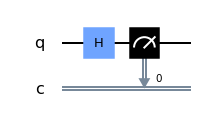

In [143]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0,0)
#Draw the circuit
qc.draw()


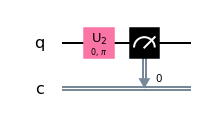

In [144]:
#Import transpile and schedule
from qiskit import transpile, schedule 
#Set the backend to ibmq_armonk
backend = provider.get_backend('ibmq_armonk')
#Transpile the circuit using basis gates from the specified backend
transpiled_qc = transpile(qc, backend)  
#Draw the transpiled circuit
transpiled_qc.draw()


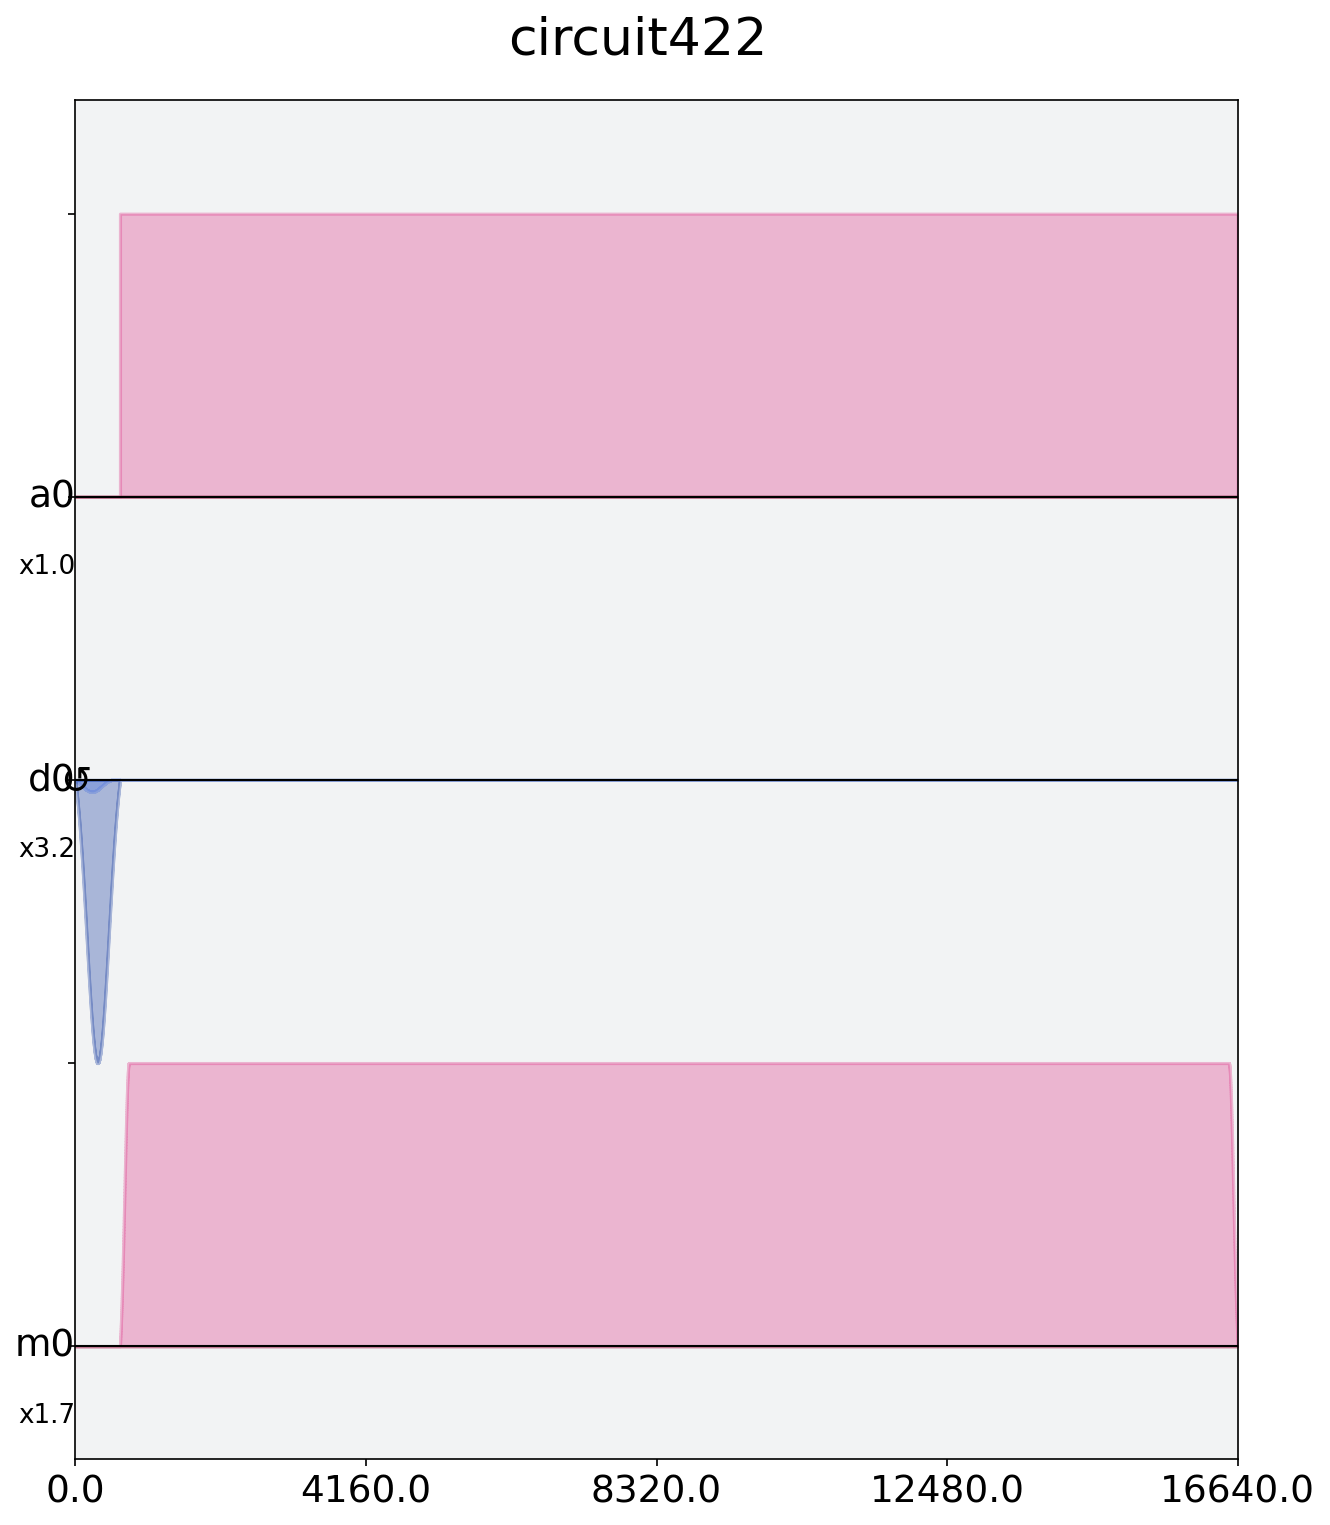

In [145]:
#Create the circuit schedule using the transpiled circuit
circuit_schedule = schedule(transpiled_qc, backend)
#Draw the circuit
circuit_schedule.draw()


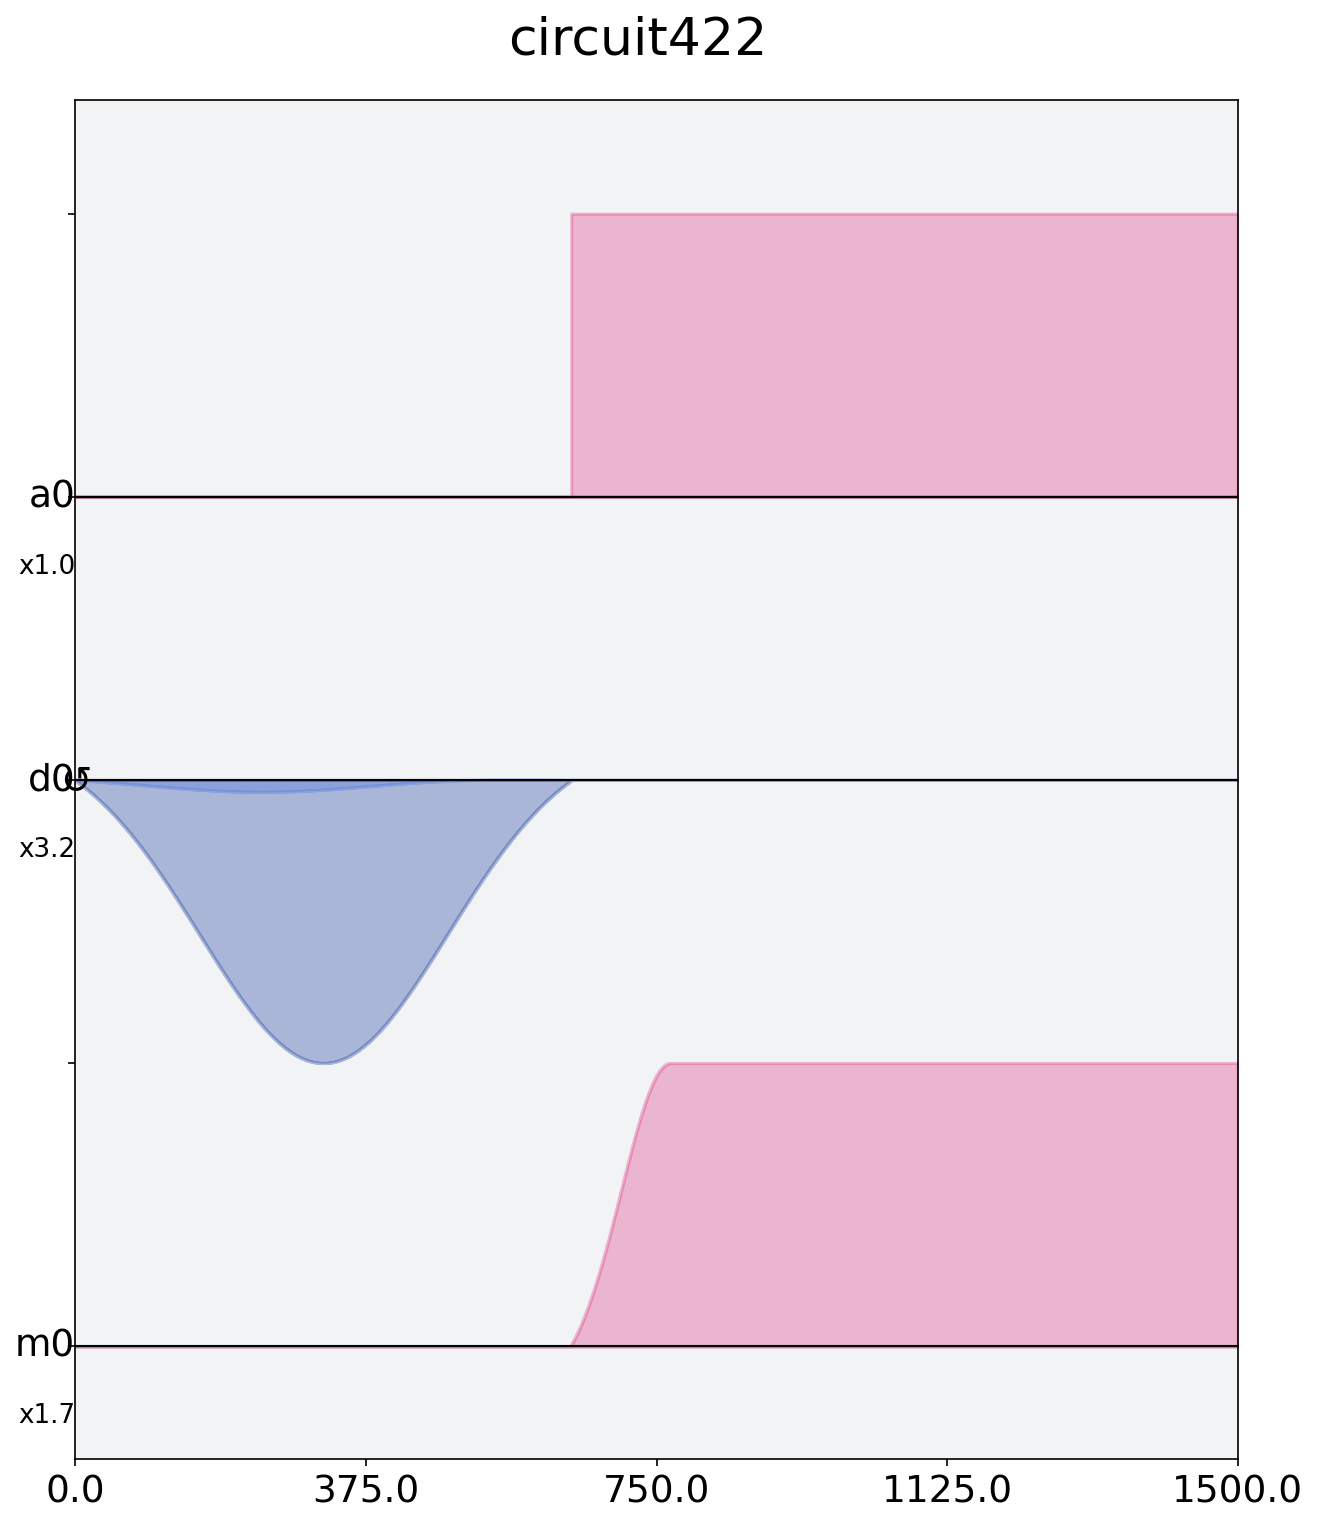

In [146]:
#Draw the circuit with a shorter time range to ease visibility
circuit_schedule.draw(plot_range=[0, 1500])


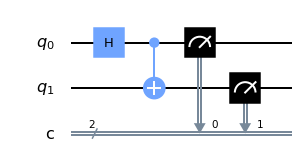

In [147]:
#Create a 2-qubit circuit
qc2 = QuantumCircuit(2, 2)
#Apply a Hadamard to the first qubit
qc2.h(0)
#Apply a CNOT gate where the Source is qubit 0, and Target qubit 1
qc2.cx(0, 1)
#Add measurement gates to all qubits
qc2.measure([0, 1], [0, 1])
#Draw the circuit
qc2.draw()


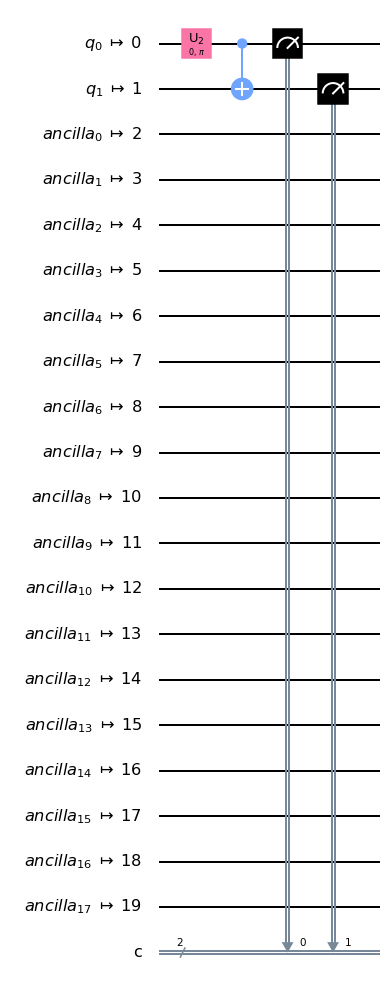

In [149]:
#Import the test backend
from qiskit.test.mock import FakeAlmaden
#Construct the backend
backend = FakeAlmaden()
#Transpile the circuit to the test backend and its basis states
transpiled_qc2 = transpile(qc2, backend)
#Draw the transpiled circuit
transpiled_qc2.draw()


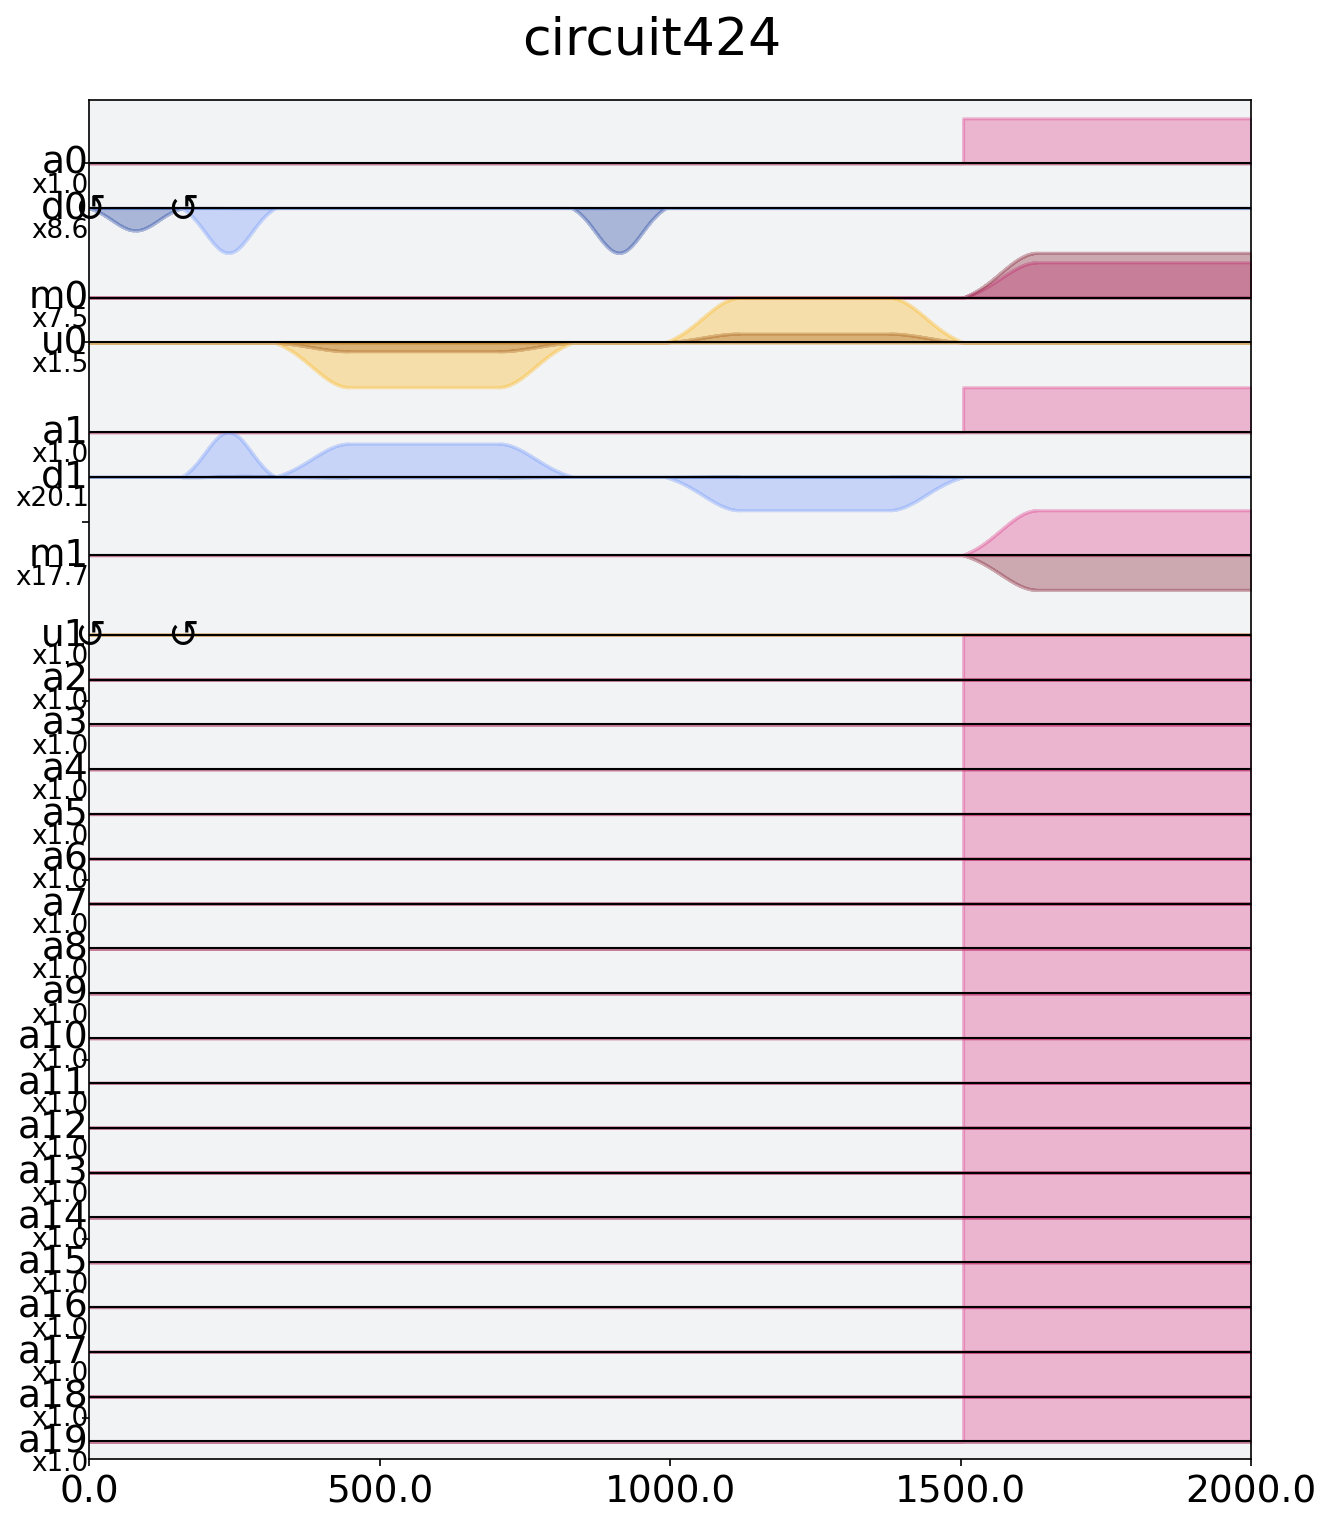

In [150]:
#Create the circuit from the transpiled circuit results
circuit_schedule2 = schedule(transpiled_qc2, backend)
#Draw the 2-qubit circuit schedule with range of 2000 time steps
circuit_schedule2.draw(plot_range=[0, 2000])


# Leveraging Provider information

In [ ]:
#Import the IBMQ interface
from qiskit import IBMQ

#Save account ONLY needed if running on a local system for first time
#Uncomment below if running for the first time on a local machine.
#IBMQ.save_account('API_TOKEN') 

#Load the account which was saved on local system using save_account.
#Note: this is handled each time a Qiskit Notebook is loaded on IQX.
IBMQ.load_account()


In [ ]:
#Indicate a hub to link account to:
IBMQ.get_provider(hub='ibm-q')
#Indicate a project which your account is associated with
IBMQ.get_provider(project='my_project')


In [152]:
#Create the Provider object using the IBMQ interface 
provider = IBMQ.get_provider(group='open')
#Query the list of backends available to your account
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [153]:
#Filter the list of backends to include only non-simulator, 
#and operational (meaning, not offline or under maintenance)
provider.backends(simulator=False, operational=True)


[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [154]:
#Select a specific device from the provider
backend = provider.get_backend('ibmq_santiago')


In [155]:
#Import the least_busy function
from qiskit.providers.ibmq import least_busy

#Identify the least busy devices 
#smaller than 6 qubits and not a simulator
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits < 6 and not x.configuration().simulator)

#Identify the least busy devices 
#larger than 6 qubits and not a simulator
large_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 6 and not x.configuration().simulator)

#Print the least busy devices
print('The least busy small devices: {}'.format(least_busy(small_devices)))
print('The least busy large devices: {}'.format(least_busy(large_devices)))


The least busy small devices: ibmqx2
The least busy large devices: ibmq_16_melbourne


# Quantum backend components

In [157]:
#Set ibmq_valencia as the backend, or whichever backend you wish
backend = provider.get_backend('ibmq_valencia')
#Confirm this is the backend selected by querying for its name,
backend.name()


'ibmq_valencia'

In [158]:
#View the status of the backend
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print('Number of pending jobs in the queue: ', jobs_in_queue)


Number of pending jobs in the queue:  6


In [159]:
#View the configuration of the backend
backend.configuration()
backend


<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>

In [160]:
# Display the number of qubits from the backend properties
backend.properties().qubits


[[Nduv(datetime.datetime(2020, 9, 10, 8, 8, 39, tzinfo=tzlocal()), T1, us, 115.58064133062457),
  Nduv(datetime.datetime(2020, 9, 10, 8, 9, 58, tzinfo=tzlocal()), T2, us, 65.6235800744468),
  Nduv(datetime.datetime(2020, 9, 10, 8, 30, 59, tzinfo=tzlocal()), frequency, GHz, 4.743903363639608),
  Nduv(datetime.datetime(2020, 9, 10, 8, 30, 59, tzinfo=tzlocal()), anharmonicity, GHz, -0.31386048358781926),
  Nduv(datetime.datetime(2020, 9, 10, 8, 7, 58, tzinfo=tzlocal()), readout_error, , 0.03749999999999998),
  Nduv(datetime.datetime(2020, 9, 10, 8, 7, 58, tzinfo=tzlocal()), prob_meas0_prep1, , 0.057499999999999996),
  Nduv(datetime.datetime(2020, 9, 10, 8, 7, 58, tzinfo=tzlocal()), prob_meas1_prep0, , 0.0175)],
 [Nduv(datetime.datetime(2020, 9, 10, 8, 8, 39, tzinfo=tzlocal()), T1, us, 85.34345940171549),
  Nduv(datetime.datetime(2020, 9, 10, 8, 10, 47, tzinfo=tzlocal()), T2, us, 56.03239645961891),
  Nduv(datetime.datetime(2020, 9, 10, 8, 30, 59, tzinfo=tzlocal()), frequency, GHz, 4.65722

In [161]:
#Print out the frequency of qubit (0)
print('Frequency of first qubit is: '+ str(backend.properties().frequency(0)))
#Print out the readout error of qubit (0)
print('Readout error of first qubit is: '+ str(backend.properties().readout_error(0)))


Frequency of first qubit is: 4743903363.639607
Readout error of first qubit is: 0.03749999999999998


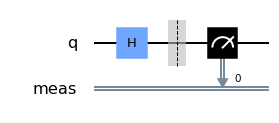

In [166]:
#Run a few jobs on this backend to generate jobs on the backend
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw()

In [ ]:
# Launch the job watcher widget
%qiskit_job_watcher

for i in range(0,3):
    result = execute(qc, backend, shots=1024).result()

In [ ]:
#List out the last 3 jobs we ran on the device
for executed_job in backend.jobs(limit=3):
    print('Job id: '
          + str(executed_job.job_id()) + ', ' 
          + str(executed_job.end_date) + ', ' 
          + str(executed_job.status()))


# Understanding the Job component

In [ ]:
#From the previous output of executed jobs, enter its job id.
job = backend.retrieve_job(executed_job.job_id())


In [ ]:
#Print the job instance status
job.status()


In [ ]:
job.result()

In [ ]:
job.backend()

In [168]:
import qiskit.tools.jupyter
%qiskit_version_table